# Week-1

**Note to Learners**:

- Click on "Copy to Drive", the button that appears just below the taskbar, to make a copy of this notebook in your drive. If you continue working with this notebook, changes **will not** be saved.


- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [3]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Transform matrix to (d,n) order

In [8]:
X=X.T

## Problem-1

How many samples does the dataset have?

In [9]:
 X.shape[0]

784

## Problem-2

How many features does the dataset have?

In [10]:
X.shape[1]

100

## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library.

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

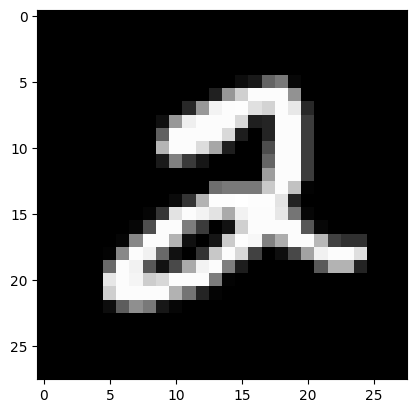

In [12]:
import matplotlib.pyplot as plt
plt.imshow(X[:,0].reshape(28,28),cmap='gray')
# X[:, 0] selects all rows (:) from the first column (0) of X.
# This implies that the first column of X contains flattened image data (e.g., an array of length 784 for a 28×28 pixel image).

## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [15]:
X=X-X.mean(axis=1).reshape(X.shape[0],1)
np.sqrt((X**2).sum())/(X.shape[0]*X.shape[1])


0.23242174456564685

## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [16]:
C=X@X.T/X.shape[1]
np.sqrt((C**2).sum())/(C.shape[0]**2)

1.3648061009232249

## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [17]:
# Enter your solution here
eigval,eigvec=np.linalg.eigh(C)# Enter your solution here


#The eigenvalue and eigenvector that we will get are arranged in the ascending order. So will use `np.flip`

eigval=np.flip(eigval)
eigvec=np.flip(eigvec,axis=1)

w1=eigvec[:,0]
w2=eigvec[:,1]

w=w1+w2

np.abs(w.sum())

1.0516243880598357

## Problem-7

Visualize the first principal component as an image.

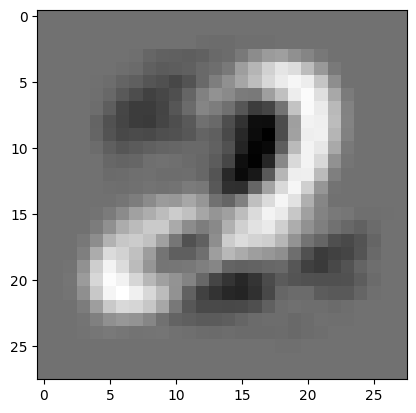

In [18]:
# Enter your solution here
plt.imshow(w1.reshape(28,28),cmap='gray')

## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [19]:
# Enter your solution here
k,sum=0,0
for i in range(C.shape[0]):
  sum+=eigval[i]
  k+=1

  if sum/eigval.sum() >= 0.95: #egival.sum() gives us the sum of all eigen values
    break
k

53

## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



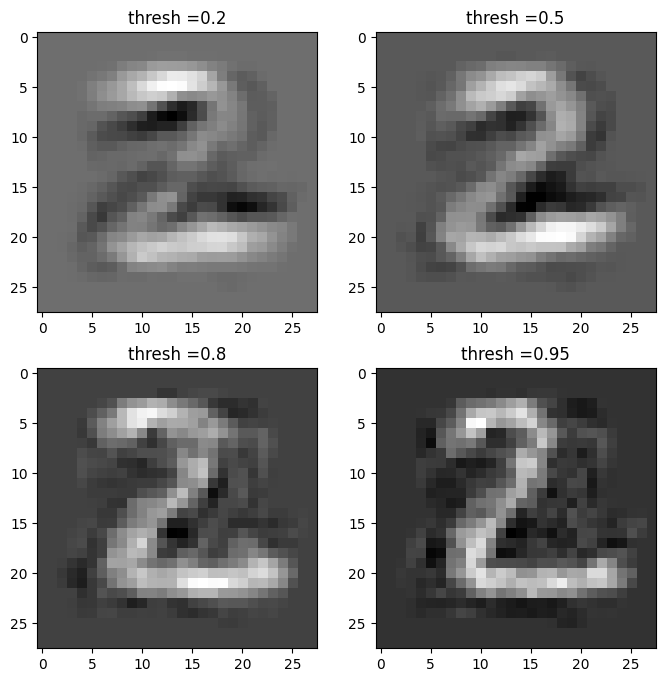

In [20]:
# Enter your solution here
# Enter your solution here
def reconstruct(thresh):
  k,sum=0,0
  for i in range(C.shape[0]):
    sum+=eigval[i]
    k+=1

    if sum/eigval.sum() >= thresh:
      break

  W=eigvec[:,:k] # W is a d,k matrix which contains the top k eigen vectors

  coeff= test_image @ W # coeff is the scalar part of projection. Here it will be
                        # order of (1,k)

  return W @ coeff #the full projection

plt.figure(figsize=(8,8)) #use this for changing the default plot size.
for i,thresh in enumerate([0.20,0.50,0.80,0.95]): #enumerate gives us list index
                                                  #starting from zero.

  recons_vec=reconstruct(thresh)

  plt.subplot(2,2,i+1)  #it gives us the facility to plot in 2,2 grid.
                        # You can use plt.subplot(m,n,i) for a (m,n) grid.
                        #i stands for the plot number.

  plt.imshow(recons_vec.reshape(28,28),cmap='gray')
  plt.title(f'thresh ={thresh}')
